In [1]:
%matplotlib inline
%pylab inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [79]:
print ("adsa")

adsa


In [229]:
FinalDF = pd.read_csv("4dec.csv")
FinalDF.columns

FinalDF['artist_category'] = FinalDF['artist'].astype('category').cat.codes

In [127]:
FinalDF

,win,year,song,artist,genre_category,genre,genre_count_old,genre_Count_from2005,inverse_score,number_of_weeks,old_popularity,artist_rank,lastfm,lastfm_rank,youtube,youtube_rank,new_total_count,rankby_total_count,groupby_10,artist_category
0,0,1964,The House Of The Rising Sun,The Animals,6,Rock,3655,1990,963,11,863,182,4600463,19,194167598,1,198768061,1,1,1617
1,0,1965,The Sound Of Silence,Simon & Garfunkel,5,Pop,1235,13616,1092,14,513,144,7006004,2,162078354,2,169084358,2,1,1521
2,0,1966,California Dreamin',The Mamas & The Papas,5,Pop,1235,13616,1265,17,195,125,3842033,30,161074487,3,164916520,3,1,1939
3,0,1961,Stand By Me,Ben E. King,9,Urban,1891,19436,1061,14,591,83,2744255,58,140751879,4,143496134,4,1,101
4,0,1966,These Boots Are Made For Walkin',Nancy Sinatra,6,Rock,3655,1990,1157,14,364,96,803381,220,111380905,5,112184286,5,1,1228
5,0,1968,Hey Jude,The Beatles,6,Rock,3655,1990,1770,19,14,2,5506995,14,89662830,9,95169825,6,1,1640
6,0,1960,I Need You Now,100 Strings and Jono (Choir of 40 Voices),6,Rock,3655,1990,3,1,8214,2188,0,8277,93305268,7,93305268,7,1,1
7,0,1965,4 - By The Beatles,The Beatles,6,Rock,3655,1990,136,5,5478,2,1,8193,89668570,8,89668571,8,1,1640
8,0,1966,"Paint It, Black",The Rolling Stones,5,Pop,1235,13616,963,11,862,47,6971647,3,80157251,12,87128898,9,1,2074
9,0,1967,A Whiter Shade Of Pale,Procol Harum,6,Rock,3655,1990,977,12,824,857,1674118,109,83706857,10,85380975,10,1,1348


In [230]:

from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(FinalDF[['artist_category','year','genre_category','old_popularity','number_of_weeks','artist_rank']],
    FinalDF['rankby_total_count'], train_size=0.7)

In [226]:
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(FinalDF[['old_popularity']],
    FinalDF['rankby_total_count'], train_size=0.7)

In [142]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(train_x, train_y) 
predict = clf.predict(test_x)

In [130]:
print (predict)

[ -33408.45088463   44293.97254623  200478.06626531 ...,   43998.7863068
   -1933.82786523   40929.12037769]


In [131]:
print (test_y)

5607        795
312     1127360
726      113811
1666        915
5267        489
6140       1489
7078        119
997       38332
5611       9394
2627       5960
2232        201
6678       4046
6709       2469
1447     135671
3733       4023
4669        766
8228         20
4423      19893
6567          1
7057        188
346      401009
2757      29654
3530       4167
7067       3402
5270        858
4312        136
7081         12
1776       1267
976      128567
226      190511
         ...   
2367      43481
6103       1372
3918       3636
1410     198466
5490         11
6752         27
7768          7
2292      26548
1232      65341
5762       3528
4521      15795
5203        292
2817       1379
6669       1768
1598      37104
7732          7
6497        887
1205      75441
3857       4734
4545      10291
5371       2598
7806        109
2116      16507
6632       4755
1574      30656
2792       7252
4425       6136
1593       9221
6272          0
5653       1612
Name: lastfm, Length: 24

In [231]:
from sklearn.linear_model import LassoLarsCV
model=LassoLarsCV(cv=10, precompute=False).fit(train_x,train_y)

In [232]:
prediction_lasso = model.predict(test_x)
prediction_lasso = list(prediction_lasso)

In [136]:
res = pd.DataFrame({'prediction_lasso':prediction_lasso, 'actual':test_y})

In [137]:
print (res)

      actual  prediction_lasso
3020    3021       6115.743536
1777    1778       2078.974177
2876    2877       4047.423394
5038    5039       4871.667111
2457    2458       5574.802786
3815    3816       5581.324710
944      945       2630.652752
2702    2703       4410.440712
5841    5842       3925.259407
3091    3092       4043.912617
2330    2331       3006.400395
4488    4489       4060.996317
1392    1393       1535.584558
8190    8191       6387.076957
2492    2493       2287.074888
7184    7185       5829.515070
4062    4063       3493.619435
6673    6674       4192.695876
8063    8064       6247.759063
2185    2186       4371.924026
1648    1649       3028.964469
2902    2903       1827.015945
4186    4187       4588.763704
681      682       2092.998648
1981    1982       2123.526160
1414    1415       3141.396463
4227    4228       3062.311540
5421    5422       6129.449217
3698    3699       4389.609733
8100    8101       6338.344076
...      ...               ...
7350    

In [227]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
mod = lm.fit(train_x,train_y)
prediction_lasso = lm.predict(test_x)

In [233]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_y, prediction_lasso)
print (mse)

mae = mean_absolute_error(test_y,prediction_lasso)
print (mae)

3906590.38476
1622.6914576


In [5]:
FinalDF.columns

Index(['win', 'year', 'song', 'artist', 'genre_category', 'genre',
       'genre_count_old', 'genre_Count_from2005', 'inverse_score',
       'number_of_weeks', 'old_popularity', 'artist_rank', 'lastfm',
       'lastfm_rank', 'youtube', 'youtube_rank', 'new_total_count',
       'rankby_total_count', 'groupby_10'],
      dtype='object')

In [33]:
FinalDF.head(100)

,win,year,song,artist,genre_category,genre,genre_count_old,genre_Count_from2005,inverse_score,number_of_weeks,old_popularity,artist_rank,lastfm,lastfm_rank,youtube,youtube_rank,new_total_count,rankby_total_count,groupby_10
0,0,1964,The House Of The Rising Sun,The Animals,6,Rock,3655,1990,963,11,863,182,4600463,19,194167598,1,198768061,1,1
1,0,1965,The Sound Of Silence,Simon & Garfunkel,5,Pop,1235,13616,1092,14,513,144,7006004,2,162078354,2,169084358,2,1
2,0,1966,California Dreamin',The Mamas & The Papas,5,Pop,1235,13616,1265,17,195,125,3842033,30,161074487,3,164916520,3,1
3,0,1961,Stand By Me,Ben E. King,9,Urban,1891,19436,1061,14,591,83,2744255,58,140751879,4,143496134,4,1
4,0,1966,These Boots Are Made For Walkin',Nancy Sinatra,6,Rock,3655,1990,1157,14,364,96,803381,220,111380905,5,112184286,5,1
5,0,1968,Hey Jude,The Beatles,6,Rock,3655,1990,1770,19,14,2,5506995,14,89662830,9,95169825,6,1
6,0,1960,I Need You Now,100 Strings and Jono (Choir of 40 Voices),6,Rock,3655,1990,3,1,8214,2188,0,8277,93305268,7,93305268,7,1
7,0,1965,4 - By The Beatles,The Beatles,6,Rock,3655,1990,136,5,5478,2,1,8193,89668570,8,89668571,8,1
8,0,1966,"Paint It, Black",The Rolling Stones,5,Pop,1235,13616,963,11,862,47,6971647,3,80157251,12,87128898,9,1
9,0,1967,A Whiter Shade Of Pale,Procol Harum,6,Rock,3655,1990,977,12,824,857,1674118,109,83706857,10,85380975,10,1


## Heat map of affective features on Song Rank

In [34]:
HeatmapDF = FinalDF

In [35]:
HeatmapDF.columns

Index(['win', 'year', 'song', 'artist', 'genre_category', 'genre',
       'genre_count_old', 'genre_Count_from2005', 'inverse_score',
       'number_of_weeks', 'old_popularity', 'artist_rank', 'lastfm',
       'lastfm_rank', 'youtube', 'youtube_rank', 'new_total_count',
       'rankby_total_count', 'groupby_10'],
      dtype='object')

In [36]:
HeatmapDF.drop(['song','artist','genre','lastfm_rank','youtube_rank','new_total_count','rankby_total_count','groupby_10'],axis = 1,inplace = True)

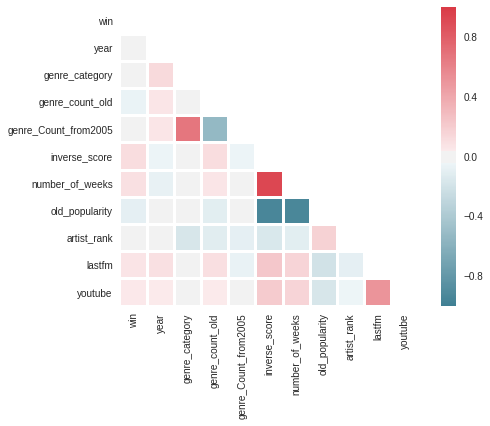

In [37]:
corr = HeatmapDF.corr(method='pearson');

sb.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths= 2, cbar_kws={"shrink": 1})

## Histograms of distribution of artists ranks

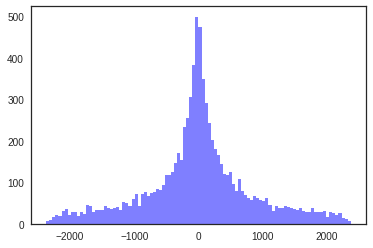

In [50]:
HeatmapDF['artist_rank'].diff().hist(color='b', alpha=0.5, bins=100, grid=False)

## Bar chart of frequency of each genere count old and genre count new

In [22]:

#print (FinalDF[['genre_category','genre_Count_from2005']])

new = FinalDF[['genre_category','genre_Count_from2005','genre_count_old']]

new = new.drop_duplicates()

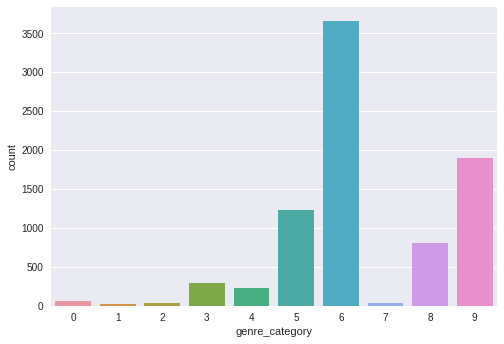

In [79]:
tmp = FinalDF[['genre_count_old','genre_category']]
sb.set(style='darkgrid')
# titanic = sb.load_dataset('tmp')
# sb.countplot(x = 'genre_category',
#               data = tmp,
#               order = tmp['genre_category'].value_counts().index)

sb.countplot(x = 'genre_category',
               data = tmp)

     genre_Count_from2005  genre_count_old  genre_category
515                  5730               58               0
366                    13               18               1
228                  1296               33               2
46                     81              298               3
77                   1250              226               4
1                   13616             1235               5
0                    1990             3655               6
599                   208               42               7
39                  12088              811               8
3                   19436             1891               9


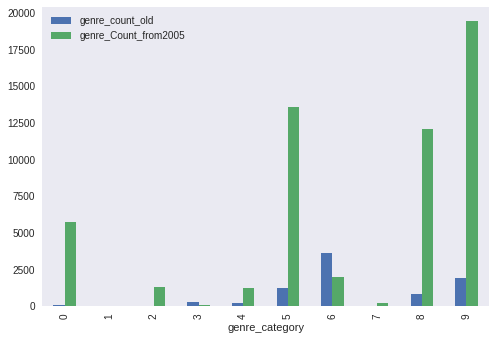

In [235]:
import matplotlib.pyplot as plt

tmp1 = new[['genre_Count_from2005','genre_count_old','genre_category']]

tmp1.sort_values('genre_category',inplace=True)
print(tmp1)
#sb.set(style='darkgrid')
# titanic = sb.load_dataset('tmp')
#sb.countplot(x = 'genre_category',data = tmp1)

tmp1.plot.bar(x='genre_category', y=['genre_count_old','genre_Count_from2005'], grid=False)